# Лабораторная работа 1 VIII.11.4

## Импорты и глобальные переменные

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
STEP = 0.01

## Условие задачи

\begin{equation}
    \begin{cases}
      y_0' = f_0(y_0, y_1, y_2, y_3) = y_2,\\
	    y_1' = f_1(y_0, y_1, y_2, y_3) = y_3,\\
	    y_2' = f_2(y_0, y_1, y_2, y_3) = -\dfrac{y_0}{(y_0^2+y_1^2)^{3/2}},\\
      y_3' = f_3(y_0, y_1, y_2, y_3) = -\dfrac{y_1}{(y_0^2+y_1^2)^{3/2}}
    \end{cases}
\end{equation}

\begin{equation}
    \begin{cases}
		y_0(0) = 0.5,\\
		y_1(0) = 0,\\
		y_2(0) = 0,\\
		y_3(0) = \sqrt{3}
    \end{cases}
\end{equation}

In [3]:
def f0(x, y):
	return y[2]

def f1(x, y):
	return y[3]

def f2(x, y):
	return -y[0]/np.power((np.power(y[0], 2) + np.power(y[1], 2)), 3/2)

def f3(x, y):
	return -y[1]/np.power((np.power(y[0], 2) + np.power(y[1], 2)), 3/2)

def func(x, y):
	return np.array([f0(x,y), f1(x,y), f2(x,y), f3(x,y)])

## Введение метода Рунге-Кутты третьего порядка

\begin{equation}
    \begin{cases}
      k_1 = f(x_n, y_n)*h\\
      k_2 = f(x_n + h/2, y_n + k_1/2)*h\\
      k_3 = f(x_n + h, y_n - k_1 + 2*k_2)*h\\
      \Delta y = \dfrac{k_1 + 4*k_2 + k_3}{6}\\
      x_{n+1} = x_n + h\\
      y_{n+1} = y_n + \Delta y
    \end{cases}
\end{equation}

In [4]:
def delta_y_kuta(x, y, func):
	k1 = func(x, y)*STEP
	k2 = func(x + STEP/2, y + k1/2)*STEP
	k3 = func(x + STEP, y - k1 + 2*k2)*STEP
	return (k1 + 4*k2 + k3)/6

## Решение методом Рунге-Кутты

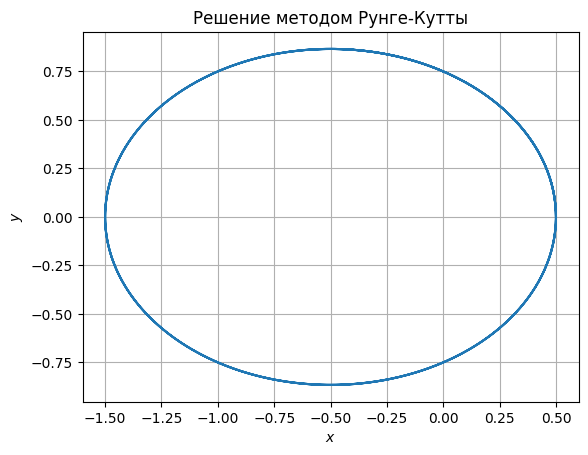

In [5]:
t = x = np.arange(0, 20, STEP)
size = np.shape(x)[0]
y = np.zeros((int(size), 4))
y[0] = np.array([0.5, 0, 0, np.sqrt(3)])

for i in range(1, size):
	y[i] = y[i-1] + delta_y_kuta(x[i-1], y[i-1], func)

x = y[:, 0]
y = y[:, 1]
fig = plt.figure()
plt.title('Решение методом Рунге-Кутты')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.plot(x, y, '-')

## Введение метода Адамса третьего порядка

\begin{equation}
    \begin{cases}
      k_1 = f(x_n, y_n)*h\\
      k_2 = f(x_{n-1}, y_{n-1})*h\\
      k_3 = f(x_{n-2}, y_{n-2})*h\\
      \Delta y = \dfrac{23*k_1 - 16*k_2 + 5*k_3}{12}\\
      x_{n+1} = x_n + h\\
      y_{n+1} = y_n + \Delta y
    \end{cases}
\end{equation}

In [6]:
def k(x, y, func):
	return func(x, y) * STEP

def delta_single_y_adam(x_i1, y_i1, x_i2, y_i2, x_i3, y_i3, func):
	return 1/12*(23*k(x_i1, y_i1, func) - 16*k(x_i2, y_i2, func) + 5*k(x_i3, y_i3, func))

def delta_y_adam(x_i1, y_i1, x_i2, y_i2, x_i3, y_i3, func):
	k1 = func(x_i1, y_i1) * STEP
	k2 = func(x_i2, y_i2) * STEP
	k3 = func(x_i3, y_i3) * STEP
	return 1/12*(23*k1 - 16*k2 + 5*k3)

## Решение методом Адамса

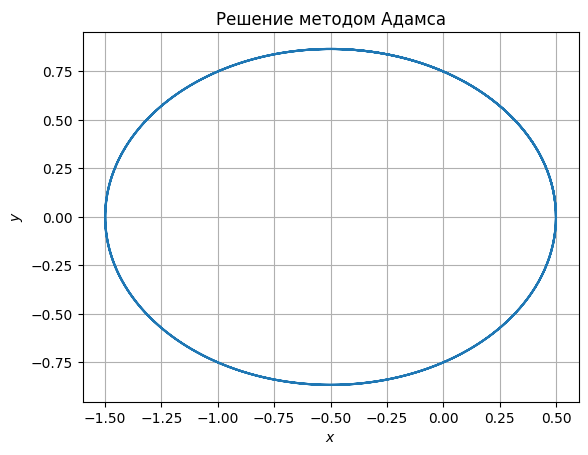

In [7]:
t = x = np.arange(0, 20, STEP)
size = np.shape(x)[0]
y = np.zeros((int(size), 4))
y[0] = np.array([0.5, 0, 0, np.sqrt(3)])

for i in range(1, 3):
	y[i] = y[i-1] + delta_y_kuta(x, y[i-1], func)

for i in range(3, size):
	y[i] = y[i-1] + delta_y_adam(x[i-1], y[i-1], x[i-2], y[i-2], x[i-3], y[i-3], func)

x = y[:, 0]
y = y[:, 1]

fig = plt.figure()
plt.title('Решение методом Адамса')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.plot(x, y, '-')